<a href="https://colab.research.google.com/github/Whimsical-Maverick/Mask-Detector/blob/main/Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!unzip "/content/drive/MyDrive/FaceMaskDetection/archive.zip" -d "/content/drive/MyDrive/FaceMaskDetection/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: /content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: /content/drive/MyDrive/Face

In [3]:
train_dir="/content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Train"
val_dir="/content/drive/MyDrive/FaceMaskDetection/Face Mask Dataset/Validation"

In [4]:
import tensorflow as tf

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    labels="inferred",
    shuffle=True
)

Found 10000 files belonging to 2 classes.


In [6]:
val_dataset=tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=32,
    labels="inferred",
    shuffle=False
)

Found 800 files belonging to 2 classes.


In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Input((224,224,3)),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1,fill_mode='nearest'),
    tf.keras.layers.RandomTranslation(0.1,0.2,fill_mode='nearest'),
    tf.keras.layers.RandomZoom(0.1,fill_mode='nearest'),
    tf.keras.layers.Rescaling(1./255),
])

In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
vgg=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [10]:
vgg.trainable=False

In [11]:
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
MachineModel=tf.keras.Sequential([
    model,
    vgg,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2,activation='softmax')
])

In [13]:
  MachineModel.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
      loss='SparseCategoricalCrossentropy',
      metrics=['accuracy']
  )

In [14]:
class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>0.95 and logs['val_accuracy']>0.95):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training=True

In [15]:
history=MachineModel.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 111s 316ms/step - accuracy: 0.9073 - loss: 0.2082 - val_accuracy: 0.9887 - val_loss: 0.0364
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 178ms/step - accuracy: 0.9812 - loss: 0.0519 - val_accuracy: 0.9925 - val_loss: 0.0237
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 176ms/step - accuracy: 0.9829 - loss: 0.0446 - val_accuracy: 0.9937 - val_loss: 0.0190
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 180ms/step - accuracy: 0.9840 - loss: 0.0457 - val_accuracy: 0.9925 - val_loss: 0.0178
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 176ms/step - accuracy: 0.9856 - loss: 0.0339 - val_accuracy: 0.9937 - val_loss: 0.0191
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 176ms/step - accuracy: 0.9879 - loss: 0.0323 - val_accuracy: 0.9887 - val_loss: 0.0246
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.9896 - loss: 0.0275 - val_accuracy: 0.9937 - val_loss: 0.0173
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.9904 - loss: 

In [16]:
import matplotlib.pyplot as plt

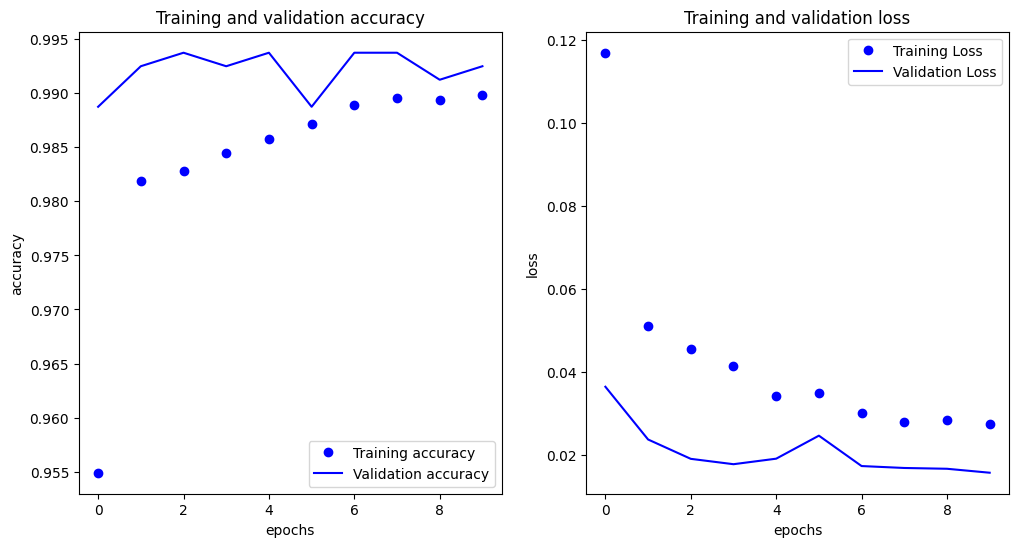

In [17]:
def plot_loss_acc(history):
    '''Plots the training and validation loss and accuracy from a history object'''
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    fig, ax = plt.subplots(1,2, figsize=(12, 6))
    ax[0].plot(epochs, acc, 'bo', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    ax[1].plot(epochs, loss, 'bo', label='Training Loss')
    ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
    ax[1].set_title('Training and validation loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

plot_loss_acc(history)

In [20]:
MachineModel.save("MaskDetection.keras")